In [3]:
import datetime

In [4]:
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
train_data = pd.read_csv('data/in/train.csv').fillna('NaN').drop(columns=['Id'])
test_data = pd.read_csv('data/in/test.csv').fillna('NaN')

In [8]:
start_training = pd.to_datetime('2020-01-19')
train_up_to = pd.to_datetime('2020-03-25')
public_test_up_to = pd.to_datetime('2020-04-08')

In [9]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

public_mask = np.logical_and(start_training < train_data['Date'], train_data['Date'] <= train_up_to)

train_data = train_data[public_mask].copy()
train_data.loc[:, ('ConfirmedCases', 'Fatalities')] = train_data.loc[:, ['ConfirmedCases', 'Fatalities']] \
                                                      .apply(lambda x: np.log1p(x), )
train_data.replace([np.inf, -np.inf], 0, inplace=True)

In [10]:
train_data['ForecastId'] = -1

test_data['ConfirmedCases'] = 0.0
test_data['Fatalities'] = 0.0

In [11]:
def lagging(df, lags=10):
    dfs = []
    for i in range(lags):
        lag_df = df.shift(i + 1, fill_value=0)
        lag_df = lag_df.rename(lambda x: x + f'_{i}', axis=1)
        dfs.append(lag_df)
    
    return pd.concat(dfs, axis=1)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
data = pd.concat([train_data, test_data], ignore_index=True)
train_mask = data['ForecastId'] == -1
test_mask = ~train_mask

/Users/nicolaepetridean/jde/projects/kaggle_covid_spread_prediction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [14]:
def add_time_features(data):
    le = LabelEncoder()
    data['Day_num'] = le.fit_transform(data.Date)
    data['Day'] = data['Date'].dt.day
    data['Month'] = data['Date'].dt.month
    return data

data = add_time_features(data)

In [15]:
data[train_mask].head()

,ConfirmedCases,Country_Region,Date,Fatalities,ForecastId,Province_State,Day_num,Day,Month
0,0.0,Afghanistan,2020-01-22,0.0,-1,NaN,0,22,1
1,0.0,Afghanistan,2020-01-23,0.0,-1,NaN,1,23,1
2,0.0,Afghanistan,2020-01-24,0.0,-1,NaN,2,24,1
3,0.0,Afghanistan,2020-01-25,0.0,-1,NaN,3,25,1
4,0.0,Afghanistan,2020-01-26,0.0,-1,NaN,4,26,1


In [16]:
data[test_mask].head()

,ConfirmedCases,Country_Region,Date,Fatalities,ForecastId,Province_State,Day_num,Day,Month
18816,0.0,Afghanistan,2020-03-19,0.0,1,NaN,57,19,3
18817,0.0,Afghanistan,2020-03-20,0.0,2,NaN,58,20,3
18818,0.0,Afghanistan,2020-03-21,0.0,3,NaN,59,21,3
18819,0.0,Afghanistan,2020-03-22,0.0,4,NaN,60,22,3
18820,0.0,Afghanistan,2020-03-23,0.0,5,NaN,61,23,3


## ML Brute-force

In [17]:
import seaborn as sns
import math

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, hinge_loss, f1_score, precision_score
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn import model_selection
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import train_test_split, TimeSeriesSplit

In [19]:
import warnings
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import tree
import warnings

warnings.filterwarnings("ignore")

In [20]:
from tqdm import tqdm_notebook as tqdm

In [21]:
# data_pred[['Predicted_ConfirmedCases', 'Predicted_Fatalities']] = data_pred[['Predicted_ConfirmedCases', 'Predicted_Fatalities']].apply(lambda x: np.expm1(x))
# data_pred.replace([np.inf, -np.inf], 0, inplace=True) 

In [22]:
def train_models(X_train, y_confirmed):
    ML_methods = [
        ensemble.AdaBoostRegressor(),
        ensemble.BaggingRegressor(),
        ensemble.ExtraTreesRegressor(),
        ensemble.RandomForestRegressor(),
        ensemble.GradientBoostingRegressor(),
        ensemble.RandomForestRegressor(),
        linear_model.PassiveAggressiveRegressor(),
        linear_model.Ridge(),
        neighbors.KNeighborsRegressor(),
        svm.SVR(),
        svm.NuSVR(),
        svm.LinearSVR(),
    ]

    ML_columns = ['ML Name', 'ML Parameters', 'ML Test Error Mean', 'ML Test Error 3*STD' ,'ML Time']
    ML_compare = pd.DataFrame(columns = ML_columns)
    ML_predict = {}

    tscv = TimeSeriesSplit(n_splits=3) 
    for row_index, clf in enumerate(ML_methods):

        cv_results = model_selection.cross_validate(clf, X_train, y_confirmed, cv=tscv, scoring='neg_mean_squared_error')

        ML_name = clf.__class__.__name__
        ML_compare.loc[row_index, 'ML Name'] = ML_name
        ML_compare.loc[row_index, 'ML Parameters'] = str(clf.get_params())
        ML_compare.loc[row_index, 'ML Time'] = cv_results['fit_time'].mean()
        ML_compare.loc[row_index, 'ML Test Error Mean'] = -1 * cv_results['test_score'].mean()   
        ML_compare.loc[row_index, 'ML Test Error 3*STD'] = 3 * cv_results['test_score'].std()

        clf = clf.fit(X_train, y_confirmed)
        ML_predict[ML_name] = np.expm1(clf.predict(X_train))
    return ML_compare, ML_predict

In [23]:
from collections import deque

In [24]:
def predict(model, test_df):
    confirmed_queue = deque(test_df.loc[:10, 'ConfirmedCases'], maxlen=10)
    fatalities_queue = deque(test_df.loc[:10, 'Fatalities'], maxlen=10)

    res = []
    for i, df_row in test_df.iterrows():
        X_test = df_row[['Day_num', 'Day', 'Month']].to_numpy().tolist()
        confirmed_pred = 1 # model.predict([X_test + list(confirmed_queue)]).flatten()
        fatalities_pred = 1 # model.predict([X_test + list(fatalities_queue)]).flatten()
        confirmed_queue.append(confirmed_pred)
        fatalities_queue.append(fatalities_pred)

        test_df.loc[i, 'ConfirmedCases'] = confirmed_pred
        test_df.loc[i, 'Fatalities'] = fatalities_pred

In [25]:
columns_to_drop = ['Date', 'Country_Region', 'Province_State', 'ConfirmedCases', 'Fatalities']

country_dfs = []
for country in tqdm(data['Country_Region'].unique()):
    country_df = data.loc[data['Country_Region'] == country]
    for state in country_df['Province_State'].unique():
        curr_state_mask = np.logical_and(data['Country_Region'] == country, data['Province_State'] == state)
        curr_state_data = data[curr_state_mask].copy()

        lags_data = lagging(curr_state_data[['ConfirmedCases', 'Fatalities']])
        data_with_lags = pd.concat([curr_state_data, lags_data], axis=1).dropna()
        state_train_mask = data_with_lags['ForecastId'] == -1
        
        state_train_data = data_with_lags[state_train_mask]
        state_test_data = data_with_lags[~state_train_mask]
        
        y_confirmed = state_train_data['ConfirmedCases'].to_numpy()
        y_fatalities = state_train_data['Fatalities'].to_numpy()
        X_train = state_train_data.drop(columns=columns_to_drop + ['ForecastId'])
        print(X_train.columns)
        predict(None, state_test_data)
        models_df, models_res = train_models(X_train, y_confirmed)
        models_df['country'] = country
        models_df['state'] = state
        country_dfs.append(models_df)
    break

Index(['Day_num', 'Day', 'Month', 'ConfirmedCases_0', 'Fatalities_0',
       'ConfirmedCases_1', 'Fatalities_1', 'ConfirmedCases_2', 'Fatalities_2',
       'ConfirmedCases_3', 'Fatalities_3', 'ConfirmedCases_4', 'Fatalities_4',
       'ConfirmedCases_5', 'Fatalities_5', 'ConfirmedCases_6', 'Fatalities_6',
       'ConfirmedCases_7', 'Fatalities_7', 'ConfirmedCases_8', 'Fatalities_8',
       'ConfirmedCases_9', 'Fatalities_9'],
      dtype='object')


In [26]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

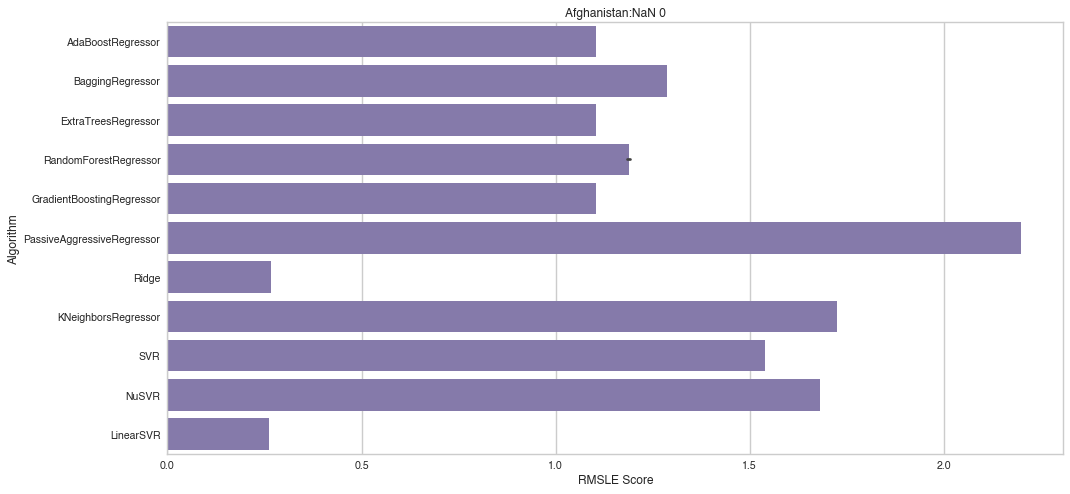

IndexError: list index out of range

<Figure size 1080x504 with 0 Axes>

In [27]:
i = 0
for country in tqdm(train_data['Country_Region'].unique()):
    country_df = train_data.loc[train_data['Country_Region'] == country]
    for state in country_df['Province_State'].unique():
        plt.figure(figsize=(15, 7))
        sns.barplot(x='ML Test Error Mean', y = 'ML Name', data = country_dfs[i], color = 'm')
        plt.title(country + ':' + state + ' ' + str(i))
        plt.xlabel('RMSLE Score')
        plt.ylabel('Algorithm')
        plt.show()
        i += 1

# Not used

In [28]:
def linreg_basic_all_countries(data, day_start):
    
    data2 = data.loc[data.Day_num >= day_start]

    # Set the dataframe where we will update the predictions
    data_pred = data[data.ForecastId != -1][['Country_Region', 'Province_State', 'Day_num', 'ForecastId']]
    data_pred = data_pred.loc[data_pred['Day_num']>=day_start]
    data_pred['Predicted_ConfirmedCases'] = [0]*len(data_pred)
    data_pred['Predicted_Fatalities'] = [0]*len(data_pred)

    print("Currently running Logistic Regression for all countries")

    # Main loop for countries
    for c in data2['Country_Region'].unique():

        # List of provinces
        provinces_list = data2[data2['Country_Region']==c]['Province_State'].unique()

        # If the country has several Province/State informed
        if len(provinces_list)>1:
            for p in provinces_list:
                data_cp = data2[(data2['Country_Region']==c) & (data2['Province_State']==p)]
                X_train, Y_train_1, Y_train_2, X_test = split_data(data_cp)
                model_1, pred_1 = lin_reg(X_train, Y_train_1, X_test)
                model_2, pred_2 = lin_reg(X_train, Y_train_2, X_test)
                data_pred.loc[((data_pred['Country_Region']==c) & (data2['Province_State']==p)), 'Predicted_ConfirmedCases'] = pred_1
                data_pred.loc[((data_pred['Country_Region']==c) & (data2['Province_State']==p)), 'Predicted_Fatalities'] = pred_2

        # No Province/State informed
        else:
            data_c = data2[(data2['Country_Region']==c)]
            X_train, Y_train_1, Y_train_2, X_test = split_data(data_c)
            model_1, pred_1 = lin_reg(X_train, Y_train_1, X_test)
            model_2, pred_2 = lin_reg(X_train, Y_train_2, X_test)
            data_pred.loc[(data_pred['Country_Region']==c), 'Predicted_ConfirmedCases'] = pred_1
            data_pred.loc[(data_pred['Country_Region']==c), 'Predicted_Fatalities'] = pred_2

    # Apply exponential transf. and clean potential infinites due to final numerical precision
    data_pred[['Predicted_ConfirmedCases', 'Predicted_Fatalities']] = data_pred[['Predicted_ConfirmedCases', 'Predicted_Fatalities']].apply(lambda x: np.expm1(x))
    data_pred.replace([np.inf, -np.inf], 0, inplace=True) 
    
    return data_pred


day_start = 45
data_pred = linreg_basic_all_countries(data, day_start)
get_submission(data_pred, 'Predicted_ConfirmedCases', 'Predicted_Fatalities')

print("Process finished in ", round(time.time() - ts, 2), " seconds")

Currently running Logistic Regression for all countries


NameError: name 'split_data' is not defined

In [ ]:
# def timeseries_train_test_split(X, y, test_size):
#     """
#         Perform train-test split with respect to time series structure
#     """
    
#     # get the index after which test set starts
#     test_index = int(len(X)*(1-test_size))
    
#     X_train = X.iloc[:test_index]
#     y_train = y.iloc[:test_index]
#     X_test = X.iloc[test_index:]
#     y_test = y.iloc[test_index:]
    
#     return X_train, X_test, y_train, y_test

In [ ]:
# from sklearn.model_selection import TimeSeriesSplit

# def timeseriesCVscore(model, X, y, n_splits, loss_function):
#     """
#         Returns error on CV  
        
#         params - vector of parameters for optimization
#         series - dataset with timeseries
#         slen - season length for Holt-Winters model
#     """
#     # errors array
#     errors = []

    
#     # set the number of folds for cross-validation
#     tscv = TimeSeriesSplit(n_splits=n_splits) 
    
#     # iterating over folds, train model on each, forecast and calculate error
#     for train, test in tscv.split(X, y):
#         start_time = time.time()
#         model = model.fit(X[train], y[train])
#         fit_time = time.time() - start_time
        
#         y_pred = model.predict(X[test])
#         y_true = y[test]
#         error = loss_function(y_pred, y_true)
#         score_time = time.time() - start_time - fit_time
#         errors.append(error)
        
#         cv_results['train_score'].append()
#         cv_results['test_score'].append(error)
    
#     res
#     return np.mean(np.array(errors))